# Building Makemore

In [1]:
import torch
import matplotlib.pyplot as plt 
import torch.nn.functional as F

import requests 

In [14]:
# url = "https://raw.githubusercontent.com/karpathy/makemore/master/names.txt"
url = "https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt" #English dictionary

res = requests.get(url)
words = (res.text).splitlines()
print(len(words), max(len(w) for w in words), min(len(w) for w in words))

370105 31 1


In [15]:
chars = sorted(list(set((''.join(words)))))  #get unique characters 
stoi = {s:i+1 for i, s in enumerate(chars)}  # map char to int
stoi["."] = 0 
itos = {i:s for s,i in stoi.items()}         # map int to char

In [16]:
# calculate bigram frequencies in Matrix Form 
N = torch.zeros(28,28,dtype=int)
b = {}
for w in  words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1][ix2] += 1

(-0.5, 27.5, 27.5, -0.5)

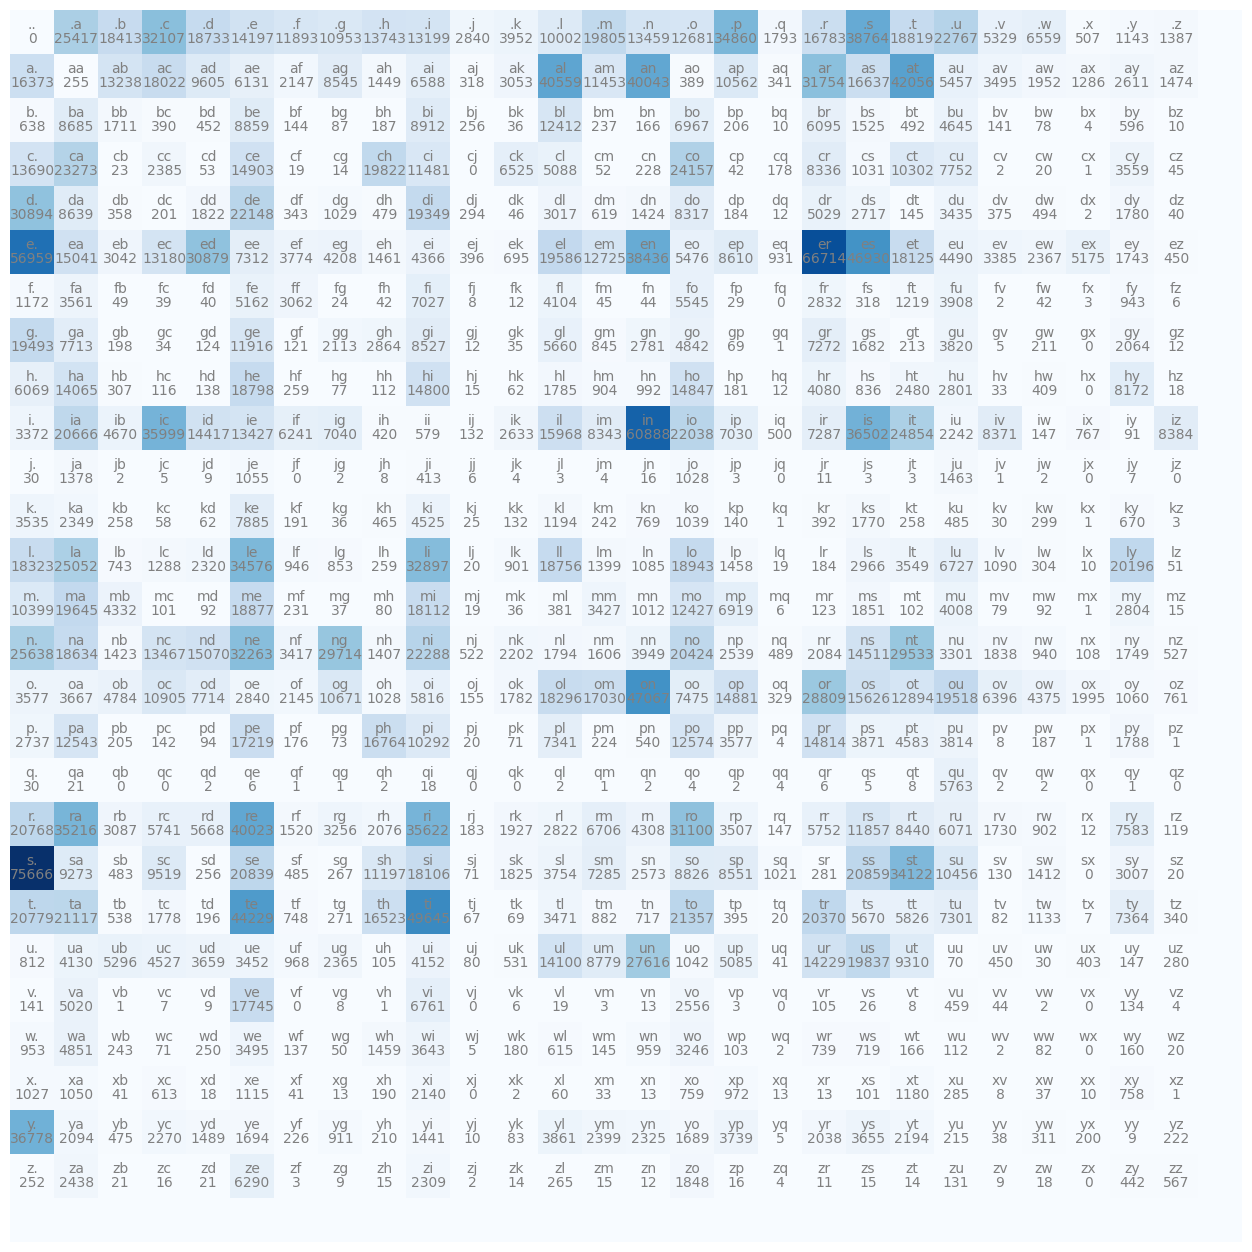

In [17]:
# plot bigram freaquencees
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va='bottom', color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [18]:
# Convert Bigram frequency matrix to probability matrix
P=(N + 1).float()# adding 1 to prevent probability from being 0 giving infinite loss
P=P/P.sum(1, keepdim=True)
print(P.shape)

torch.Size([28, 28])


In [19]:
# sampling dumb lang  model basesd on probability matrix 
g=torch.Generator().manual_seed(2147483647)
for i in range(20):

  ix = 0
  out = []
  while True:
    p = P[ix]   
    #to compare againet completely random 
    # p=N[ix].float()
    # p=p/p.sum()
    # p=torch.ones(27)/27
    ix = torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cavanethecabowioridiotrors.
miry.
dicubunomusorintinaswips.
entall.
ntanler.
par.
piss.
d.
ergerond.
hsullyckrblicasubrntirexeterheresecezead.
cowioelacti.
richic.
ng.
sin.
boldipr.
atreriseroverelinosunartal.
lioveceneresros.
kserowininsharom.
orbinthamorg.
wl.


In [20]:
# loss calculation for model based on probability materix 
logLikelihood = 0.0
nll = 0
n = 0
for w in  words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob) #multiplication of probabilites same as addition of negative log probabilites
        logLikelihood += logprob
        n += 1  
    nll = -logLikelihood
      
print(f"log {logLikelihood}")
print(f"nll {nll}")
print(f"LOSS nll/n {nll/n}")


log -9876813.0
nll 9876813.0
LOSS nll/n 2.5555739402770996


In [21]:
# Till now we were directly using prob matrix with wass calculated directly on the entire datset 
# Now we will be training a model to do that task instead of explicitly making a matrix

#increasing the probability is the same as increasing log(prob) which is the same as decreasing negative log(prob)

In [22]:
#create training set 
xs, ys = [], []
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # print(ch1,ch2) be carful with prints and for loops long for loops are very hard to stop ,kernel become un alive 
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [23]:
W = torch.randn((27,27),requires_grad=True).float()

0 tensor(2.5803)
10 tensor(2.5789)
20 tensor(2.5777)
30 tensor(2.5767)
40 tensor(2.5760)
50 tensor(2.5753)
60 tensor(2.5748)
70 tensor(2.5744)
80 tensor(2.5740)
90 tensor(2.5737)
100 tensor(2.5734)
110 tensor(2.5732)
120 tensor(2.5730)
130 tensor(2.5728)
140 tensor(2.5727)


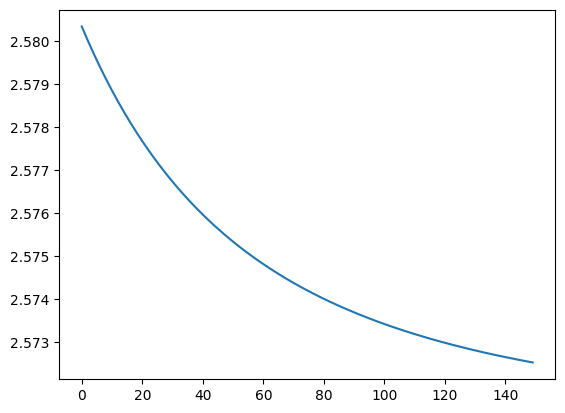

In [25]:
lossi= []

xenc=F.one_hot(xs,num_classes=27).float()
for k in range(150):
    # forward pass
    num=xs.nelement()
    logits= xenc@W
    counts = logits.exp()     
    probs = counts/counts.sum(1,keepdims=True)

    # loss calculation
    loss = -probs[torch.arange(num),ys].log().mean() +0.01*(W**2).mean() #regularization ie smoothing the weights
    # loss = F.cross_entropy(probs,ys) #better way to do the above without reinventing the wheel

    W.grad=None 
    loss.backward()
    lossi.append(loss.data)
    
    if k%10==0:
        print(k,loss.data)
    
    # update weights
    with torch.no_grad():
        W.data += -50*W.grad
    
plt.plot(lossi)

In [26]:
#Yay almost the same loss as the model with direct Prob matrix

# Now we will sample the MLP model
g = torch.Generator().manual_seed(2147647)
for i in range(20):

  ix = 0
  out = []
  
  while True:
    # p=P[ix]   
    xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts/counts.sum(1,keepdims=True)
    ix = torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
    
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

worptromuntenorninsl.
n.
ameredn.
ichatratshoqveronasmaw.
coprrtygerat.
e.
pesene.
uditaunsoponal.
drtetang.
phangojopzhecoriqungtes.
musemarditlgerasy.
d.
ps.
phthatsleva.
lanty.
ssytourericheneras.
shintizalulin.
jite.
g.
litrounausiofopraradezed.


In [15]:
# Yup almost the same samples as well 